In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

data = pd.read_csv("assgmt01_student_performance_dataset.csv")

print(data.head())
print(data.isnull().sum())
print(data.describe())
print(data.dtypes)
# Get a summary of the dataset including data types
data.info()


   study_hours_per_week  attendance_rate  previous_exam_scores  \
0                  11.0            96.73                 46.86   
1                  24.0            81.91                 64.87   
2                  19.0            75.83                 91.81   
3                  15.0            82.86                 95.38   
4                  12.0              NaN                 67.94   

   assignments_completed  extracurricular_participation  \
0                    NaN                            1.0   
1                   18.0                            0.0   
2                   13.0                            1.0   
3                    3.0                            0.0   
4                   12.0                            4.0   

   study_attendance_interaction  study_hours_per_week_squared  \
0                       1064.04                         121.0   
1                           NaN                         576.0   
2                       1440.86                      

In [40]:
# Check for missing values
missing_values_summary = data.isnull().sum()
print(missing_values_summary)

# Check the percentage of missing values for each feature
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

study_hours_per_week             4
attendance_rate                  3
previous_exam_scores             2
assignments_completed            4
extracurricular_participation    2
study_attendance_interaction     5
study_hours_per_week_squared     1
attendance_rate_squared          3
assignments_per_week             0
final_exam_score                 0
dtype: int64
study_hours_per_week             0.8
attendance_rate                  0.6
previous_exam_scores             0.4
assignments_completed            0.8
extracurricular_participation    0.4
study_attendance_interaction     1.0
study_hours_per_week_squared     0.2
attendance_rate_squared          0.6
assignments_per_week             0.0
final_exam_score                 0.0
dtype: float64


In [41]:
# 1. study_hours_per_week: Using median imputation
if data['study_hours_per_week'].isnull().sum() > 0:
    median_value = data['study_hours_per_week'].median()
    data['study_hours_per_week'].fillna(median_value, inplace=True)

# 2. attendance_rate: Using median imputation
if data['attendance_rate'].isnull().sum() > 0:
    median_value = data['attendance_rate'].median()
    data['attendance_rate'].fillna(median_value, inplace=True)

# 3. previous_exam_scores: Using median imputation
if data['previous_exam_scores'].isnull().sum() > 0:
    median_value = data['previous_exam_scores'].median()
    data['previous_exam_scores'].fillna(median_value, inplace=True)

# 4. assignments_completed: Using median imputation
if data['assignments_completed'].isnull().sum() > 0:
    median_value = data['assignments_completed'].median()
    data['assignments_completed'].fillna(median_value, inplace=True)

# 5. extracurricular_participation: Using mode imputation
if data['extracurricular_participation'].isnull().sum() > 0:
    mode_value = data['extracurricular_participation'].mode()[0]
    data['extracurricular_participation'].fillna(mode_value, inplace=True)

# 6. study_attendance_interaction: Using median imputation
if data['study_attendance_interaction'].isnull().sum() > 0:
    median_value = data['study_attendance_interaction'].median()
    data['study_attendance_interaction'].fillna(median_value, inplace=True)

# 7. study_hours_per_week_squared: Recalculate based on imputed study_hours_per_week
if data['study_hours_per_week_squared'].isnull().sum() > 0:
    data['study_hours_per_week_squared'] = data['study_hours_per_week'] ** 2

# 8. attendance_rate_squared: Recalculate based on imputed attendance_rate
if data['attendance_rate_squared'].isnull().sum() > 0:
    data['attendance_rate_squared'] = data['attendance_rate'] ** 2

# Display the cleaned data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   study_hours_per_week           500 non-null    float64
 1   attendance_rate                500 non-null    float64
 2   previous_exam_scores           500 non-null    float64
 3   assignments_completed          500 non-null    float64
 4   extracurricular_participation  500 non-null    float64
 5   study_attendance_interaction   500 non-null    float64
 6   study_hours_per_week_squared   500 non-null    float64
 7   attendance_rate_squared        500 non-null    float64
 8   assignments_per_week           500 non-null    float64
 9   final_exam_score               500 non-null    float64
dtypes: float64(10)
memory usage: 39.2 KB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6000\1287484085.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['study_hours_per_week'].fillna(median_value, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6000\1287484085.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

Skewness for study_hours_per_week: -0.03
Skewness for attendance_rate: -0.08
Skewness for previous_exam_scores: -0.13
Skewness for assignments_completed: 0.04
Skewness for extracurricular_participation: -0.13
Skewness for study_attendance_interaction: 0.30
Skewness for study_hours_per_week_squared: 0.43
Skewness for attendance_rate_squared: 0.16
Skewness for assignments_per_week: 1.58
Skewness for final_exam_score: 0.16


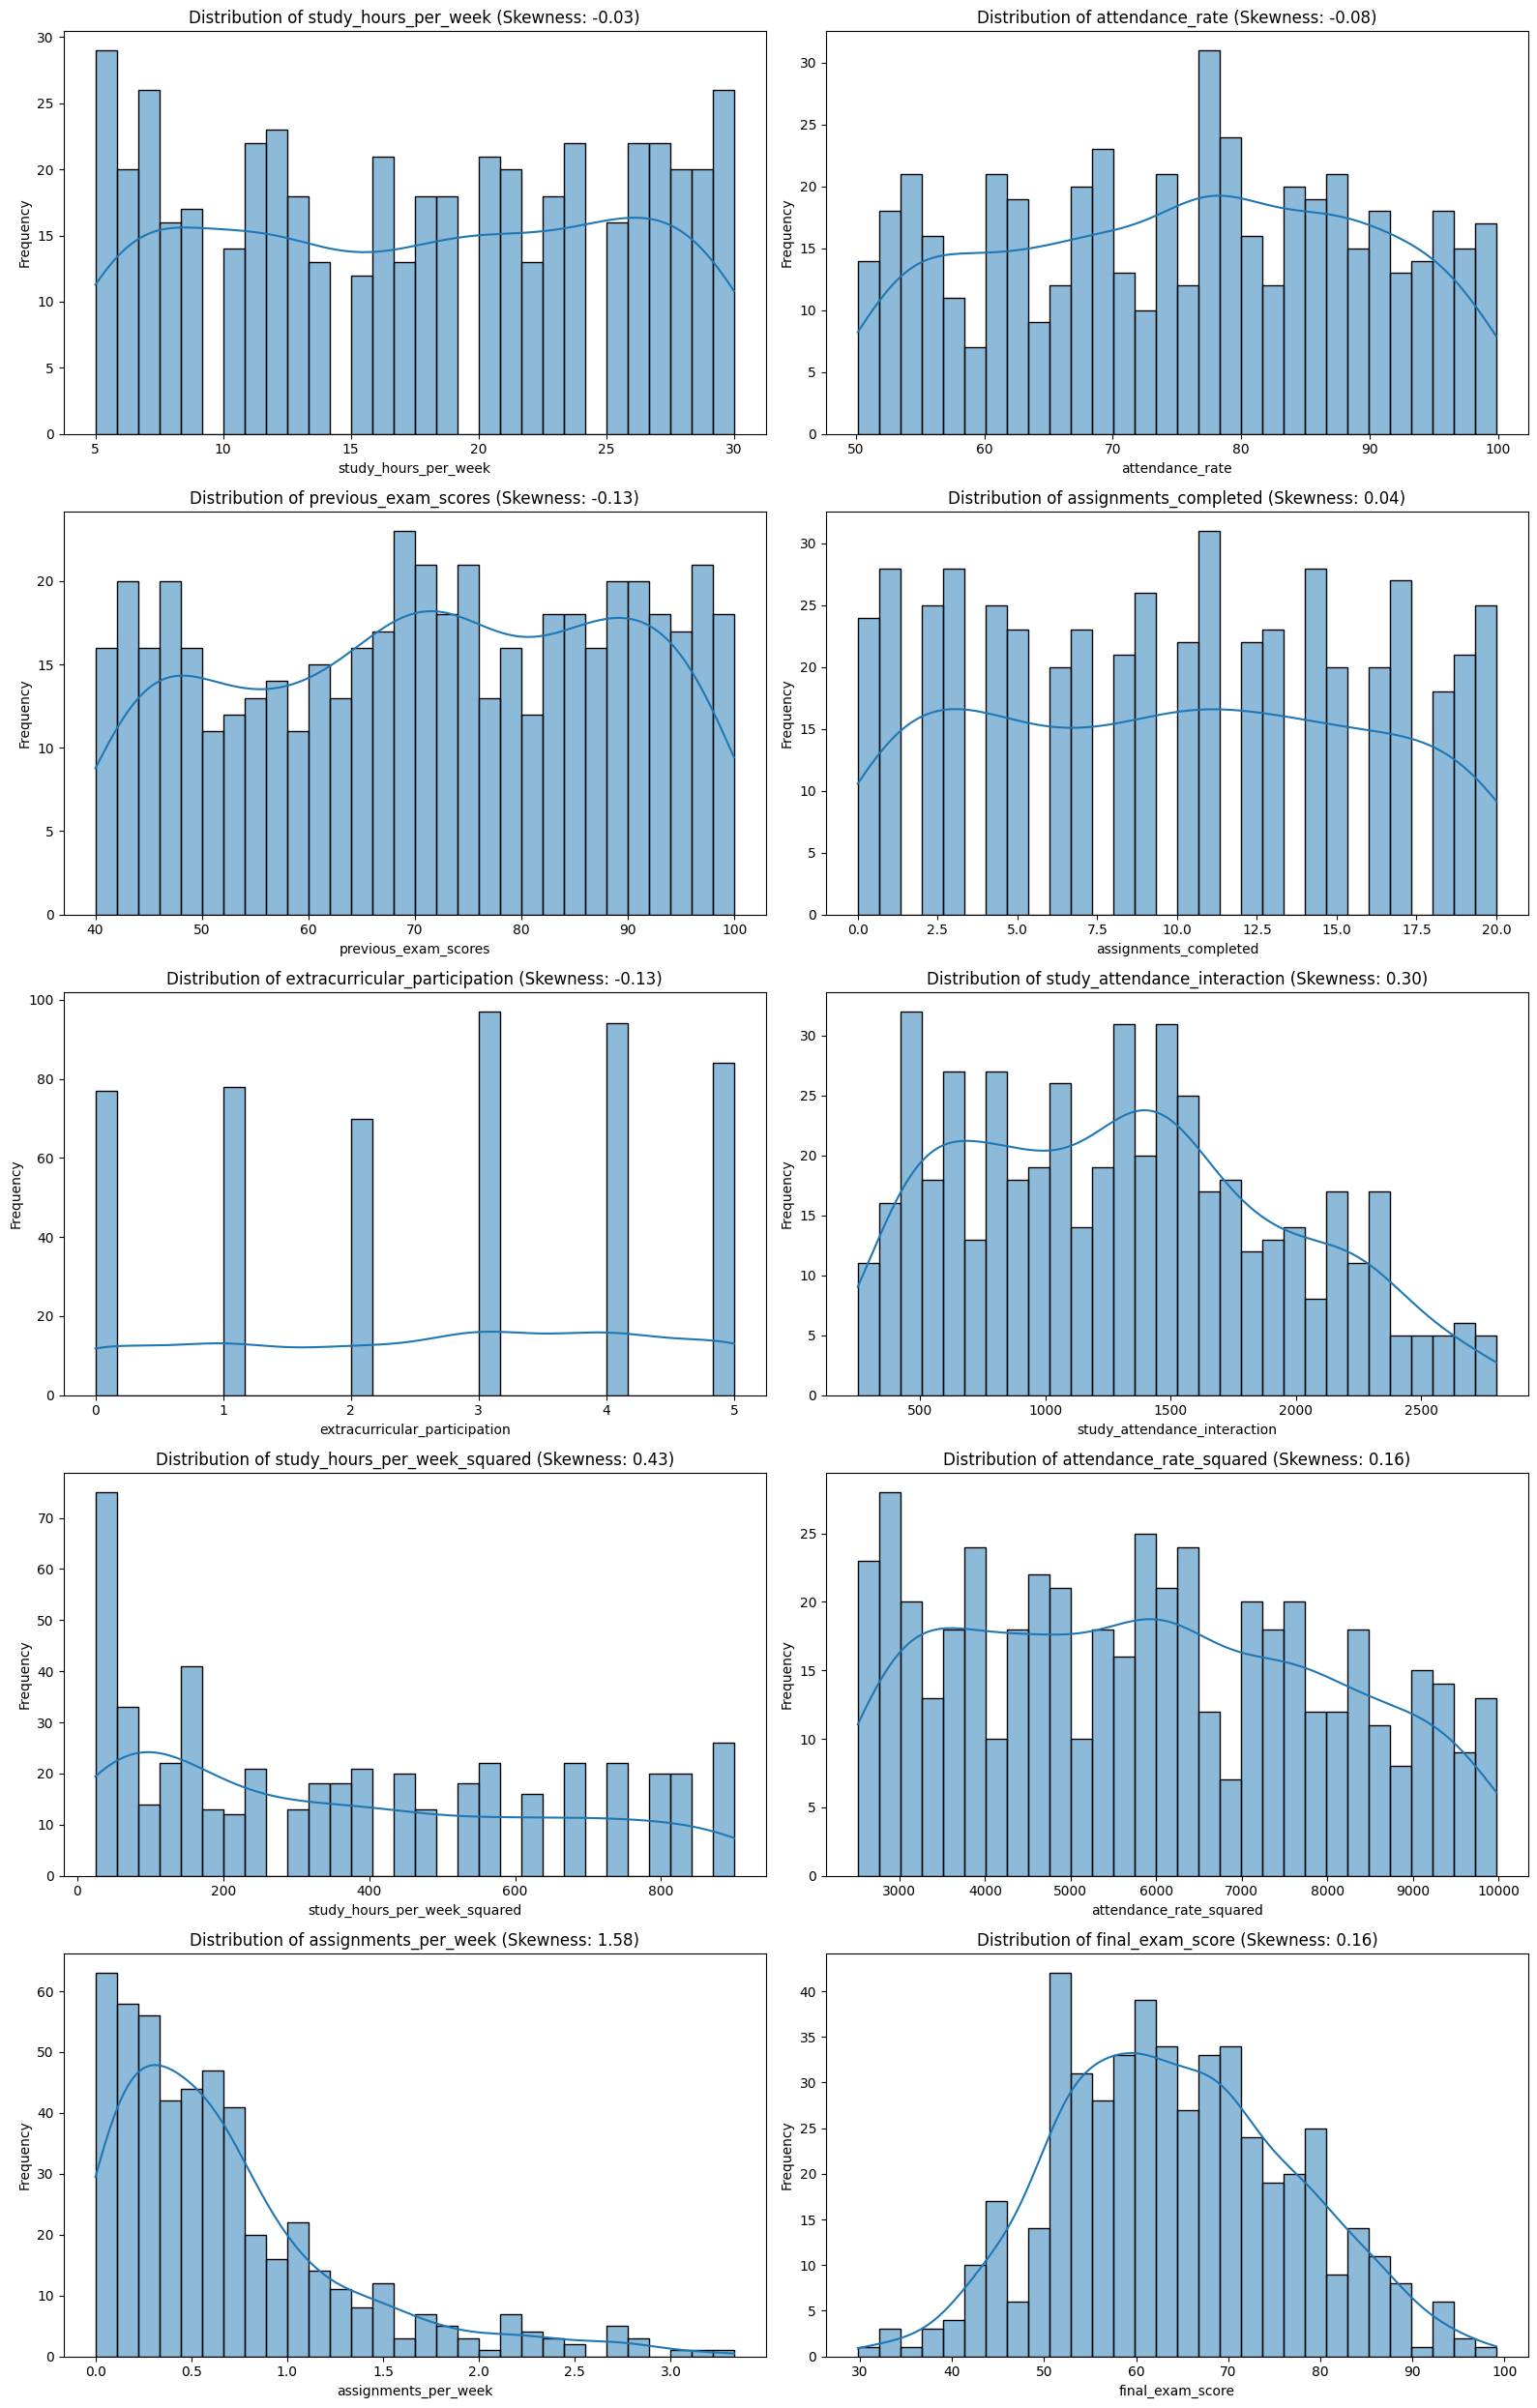

In [42]:
# Function to view skewness and distribution for each feature
numerical_columns = [column for column in data.columns if data[column].dtype != 'object']

# Calculate skewness and plot all distributions in a grid
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Calculate skewness
    feature_skewness = skew(data[column].dropna())
    print(f'Skewness for {column}: {feature_skewness:.2f}')
    
    # Plot the distribution
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} (Skewness: {feature_skewness:.2f})')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [43]:
# Feature Scaling
# Creating separate scalers for Standardization and Normalization
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Select features that need scaling based on their requirements
features_to_standardize = [
    'study_hours_per_week', 'attendance_rate', 'previous_exam_scores', 
    'assignments_completed', 'extracurricular_participation', 'study_attendance_interaction', 
    'study_hours_per_week_squared', 'attendance_rate_squared'
]
features_to_normalize = ['assignments_per_week']

# Standardize the selected features
data[features_to_standardize] = standard_scaler.fit_transform(data[features_to_standardize])

# Normalize the selected features
data[features_to_normalize] = minmax_scaler.fit_transform(data[features_to_normalize])

# Display the scaled dataset summary
print(data.describe())
print(data.head())


       study_hours_per_week  attendance_rate  previous_exam_scores  \
count          5.000000e+02     5.000000e+02          5.000000e+02   
mean          -8.881784e-17    -8.455459e-16         -8.171241e-17   
std            1.001002e+00     1.001002e+00          1.001002e+00   
min           -1.581574e+00    -1.798577e+00         -1.770362e+00   
25%           -8.235099e-01    -8.805283e-01         -8.455021e-01   
50%            6.089778e-02     9.264197e-02          3.755740e-02   
75%            9.453054e-01     8.246979e-01          8.670163e-01   
max            1.577025e+00     1.739901e+00          1.639036e+00   

       assignments_completed  extracurricular_participation  \
count           5.000000e+02                   5.000000e+02   
mean           -2.486900e-17                   4.973799e-17   
std             1.001002e+00                   1.001002e+00   
min            -1.608569e+00                  -1.543892e+00   
25%            -9.490489e-01                  -9.52362

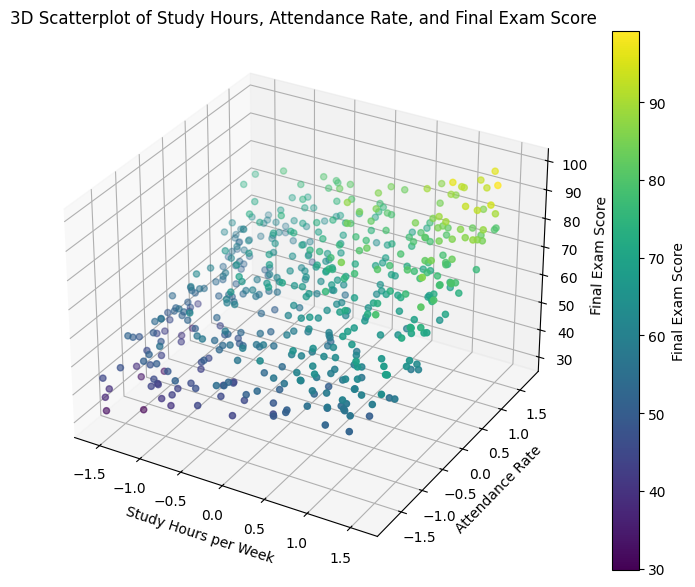

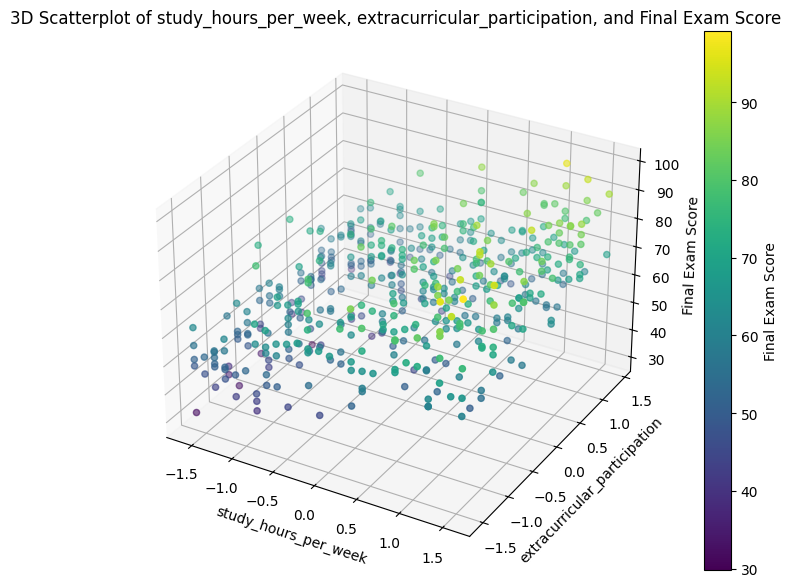

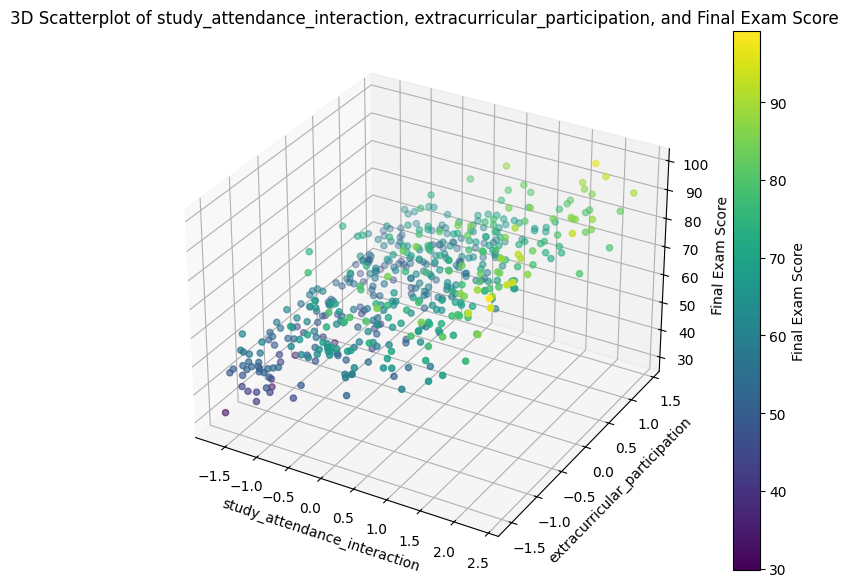

In [44]:
# Creating a 3D Scatterplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Using three features for visualization
scatter = ax.scatter(data['study_hours_per_week'], data['attendance_rate'], data['final_exam_score'], c=data['final_exam_score'], cmap='viridis', marker='o')
ax.set_xlabel('Study Hours per Week')
ax.set_ylabel('Attendance Rate')
ax.set_zlabel('Final Exam Score')
plt.title('3D Scatterplot of Study Hours, Attendance Rate, and Final Exam Score')
fig.colorbar(scatter, label='Final Exam Score')
plt.show()

# Creating a 3D Scatterplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Using three features for visualization
scatter = ax.scatter(data['study_hours_per_week'], data['extracurricular_participation'], data['final_exam_score'], c=data['final_exam_score'], cmap='viridis', marker='o')
ax.set_xlabel('study_hours_per_week')
ax.set_ylabel('extracurricular_participation')
ax.set_zlabel('Final Exam Score')
plt.title('3D Scatterplot of study_hours_per_week, extracurricular_participation, and Final Exam Score')
fig.colorbar(scatter, label='Final Exam Score')
plt.show()

# Creating a 3D Scatterplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Using three features for visualization
scatter = ax.scatter(data['study_attendance_interaction'], data['extracurricular_participation'], data['final_exam_score'], c=data['final_exam_score'], cmap='viridis', marker='o')
ax.set_xlabel('study_attendance_interaction')
ax.set_ylabel('extracurricular_participation')
ax.set_zlabel('Final Exam Score')
plt.title('3D Scatterplot of study_attendance_interaction, extracurricular_participation, and Final Exam Score')
fig.colorbar(scatter, label='Final Exam Score')
plt.show()

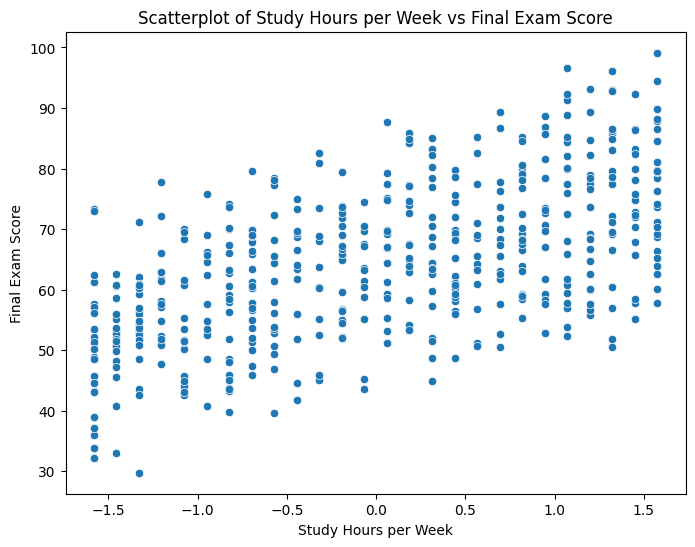

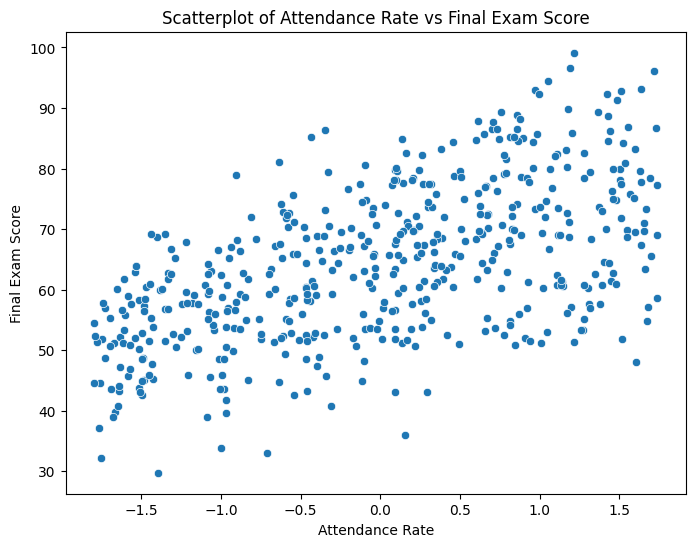

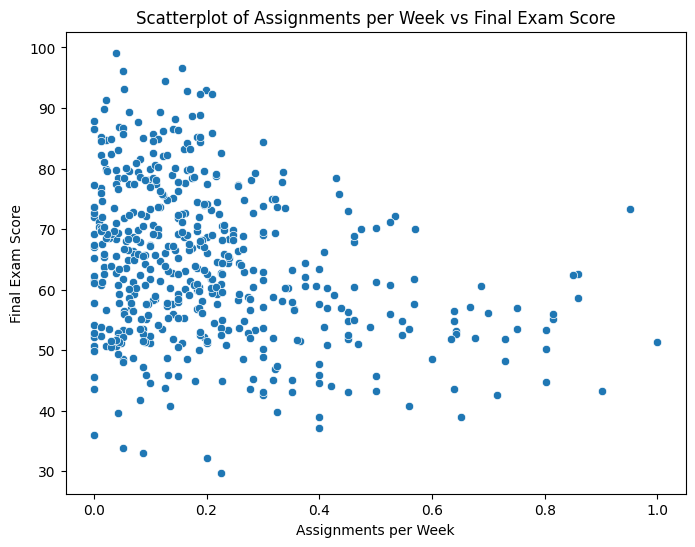

In [45]:
# Creating Normal Scatterplots to Visualize Relationships Between Features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='study_hours_per_week', y='final_exam_score', data=data)
plt.title('Scatterplot of Study Hours per Week vs Final Exam Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Exam Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='attendance_rate', y='final_exam_score', data=data)
plt.title('Scatterplot of Attendance Rate vs Final Exam Score')
plt.xlabel('Attendance Rate')
plt.ylabel('Final Exam Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='assignments_per_week', y='final_exam_score', data=data)
plt.title('Scatterplot of Assignments per Week vs Final Exam Score')
plt.xlabel('Assignments per Week')
plt.ylabel('Final Exam Score')
plt.show()

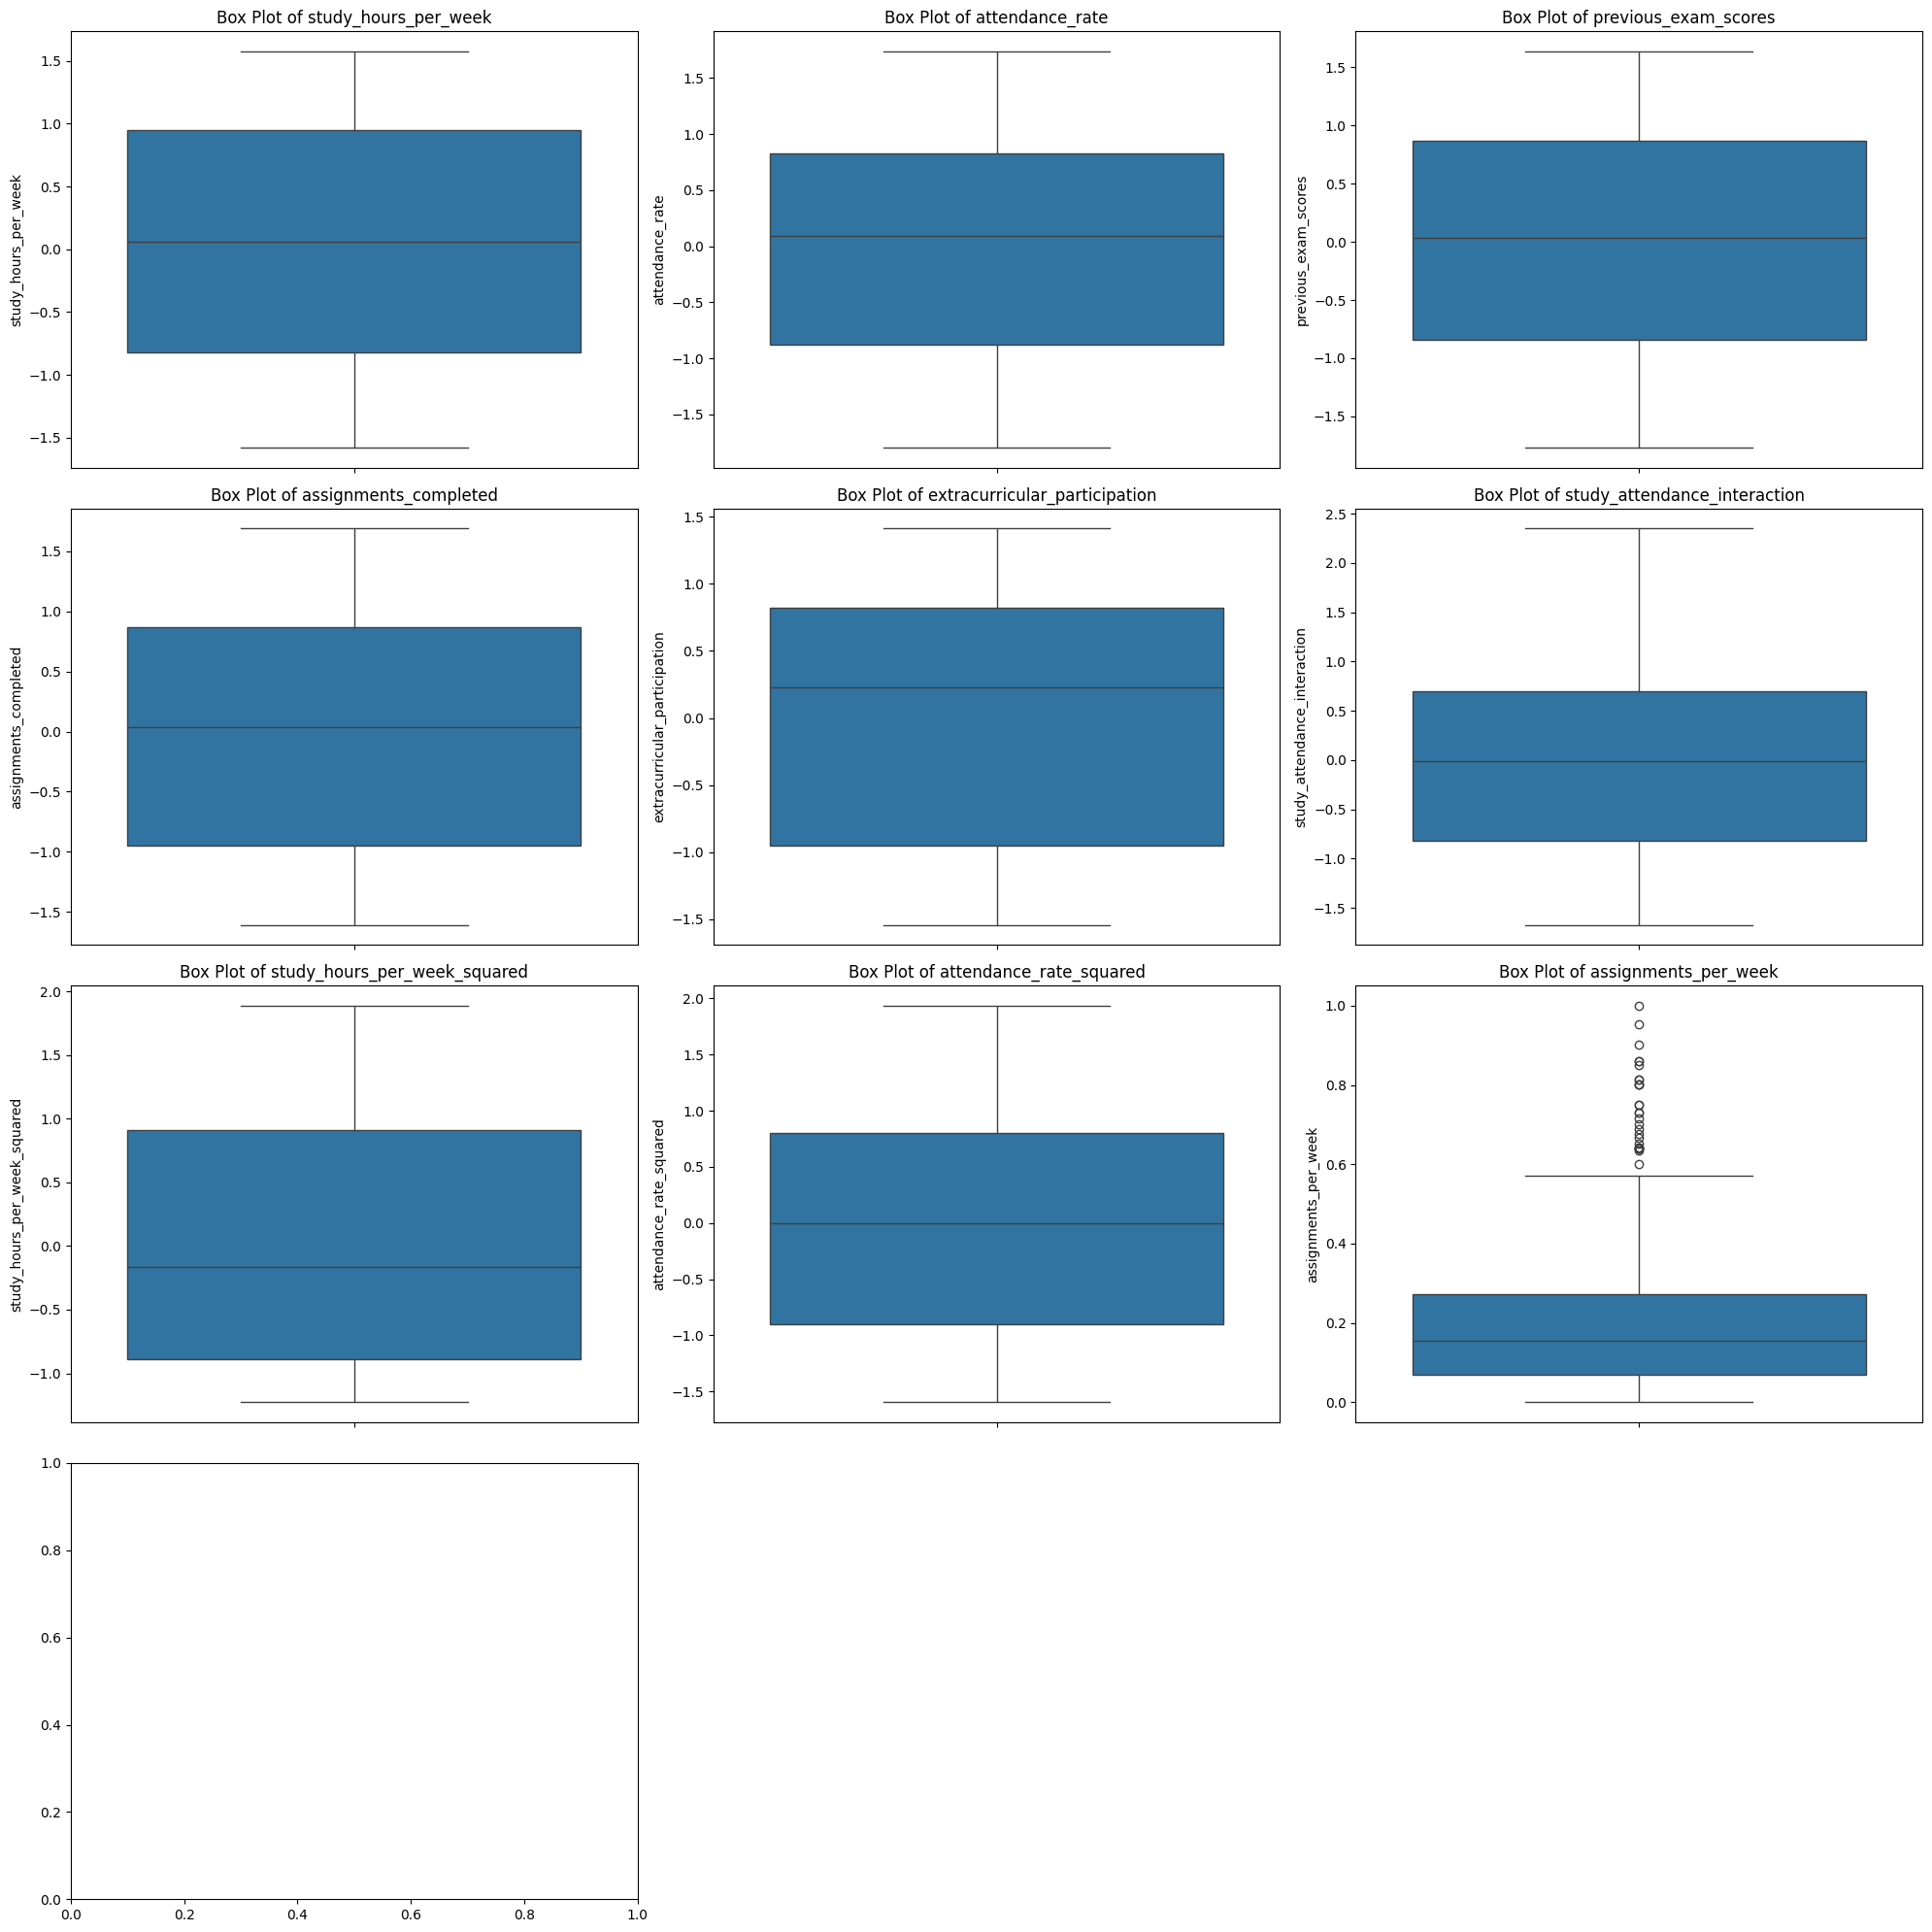

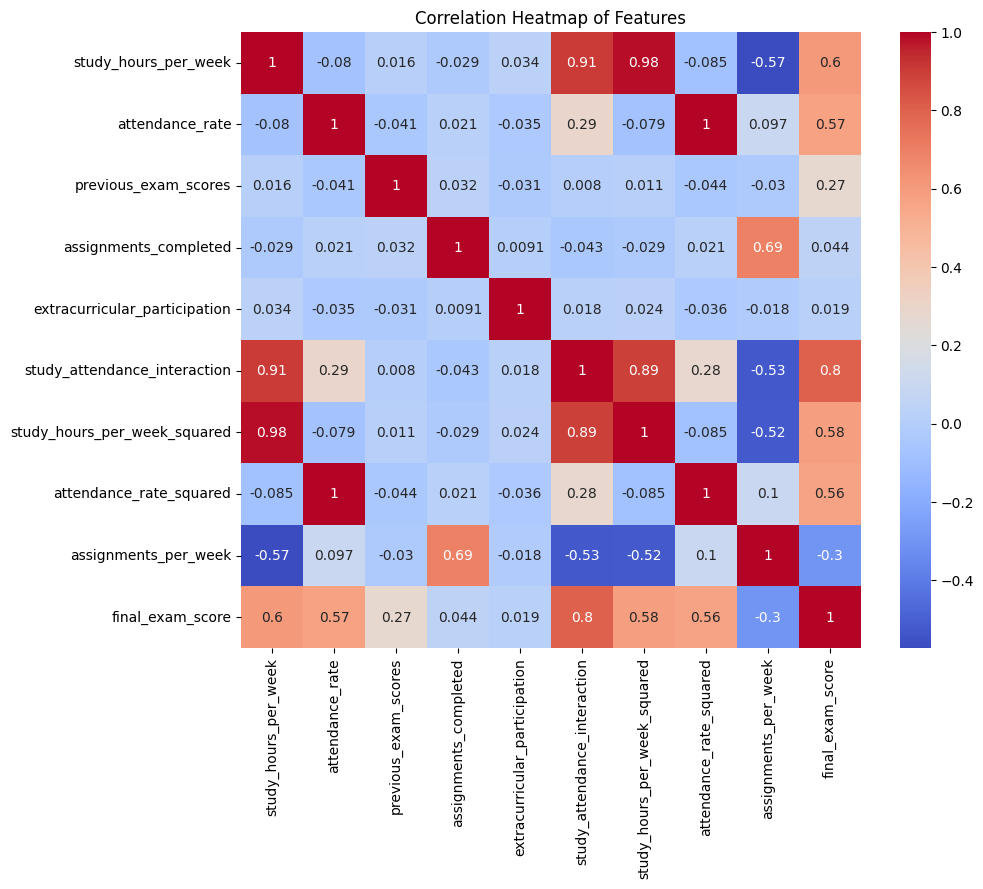

In [46]:
# Box Plots (3x3 Grid for Better Visualization)
n_cols = 3
n_rows = (len(numerical_columns) - 1 + n_cols) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    if column != 'final_exam_score':
        sns.boxplot(y=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
        axes[i].set_ylabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [47]:
# Calculate Correlation Coefficients for Key Features
key_features = ['study_hours_per_week', 'attendance_rate', 'assignments_per_week', 'final_exam_score']
correlation_matrix = data[key_features].corr()
print("\nCorrelation Coefficients for Key Features:\n", correlation_matrix)


Correlation Coefficients for Key Features:
                       study_hours_per_week  attendance_rate  \
study_hours_per_week              1.000000        -0.079794   
attendance_rate                  -0.079794         1.000000   
assignments_per_week             -0.573345         0.097464   
final_exam_score                  0.602890         0.572955   

                      assignments_per_week  final_exam_score  
study_hours_per_week             -0.573345          0.602890  
attendance_rate                   0.097464          0.572955  
assignments_per_week              1.000000         -0.299554  
final_exam_score                 -0.299554          1.000000  



Variance Inflation Factor (VIF) for Features:
                          Feature         VIF
0                          const    8.598566
1           study_hours_per_week   63.486118
2                attendance_rate  139.559287
3           previous_exam_scores    1.014883
4          assignments_completed    3.926537
5  extracurricular_participation    1.006383
6   study_attendance_interaction   21.900399
7   study_hours_per_week_squared   38.073889
8        attendance_rate_squared  132.471791
9           assignments_per_week    6.413862


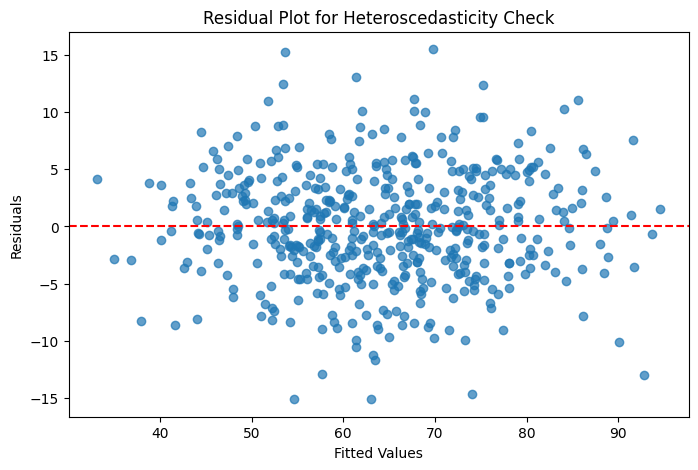


--- Results of White's Test ---
{'Test Statistic': 54.35181249626714, 'Test Statistic p-value': 0.38498430553607543, 'F-Statistic': 1.0483977162620137, 'F-Test p-value': 0.3882586115726474}


In [48]:
!pip install statsmodels 

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
import matplotlib.pyplot as plt

# Multicollinearity Check using Variance Inflation Factor (VIF)
X = data.drop(columns=['final_exam_score'])
X = sm.add_constant(X)  # Add a constant term for the intercept
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) for Features:\n", vif_data)

# Detecting Heteroscedasticity using Residual Plot
model = LinearRegression()
X_no_const = data.drop(columns=['final_exam_score'])
y = data['final_exam_score']
model.fit(X_no_const, y)
residuals = y - model.predict(X_no_const)

plt.figure(figsize=(8, 5))
plt.scatter(x=model.predict(X_no_const), y=residuals, alpha=0.7)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroscedasticity Check')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Fit the regression model using OLS
X_no_const = data.drop(columns=['final_exam_score'])
X_with_const = sm.add_constant(X_no_const)  # Add constant term for OLS regression
y = data['final_exam_score']

# Fit the OLS model
model = sm.OLS(y, X_with_const).fit()

# Perform White's test
white_test = het_white(model.resid, model.model.exog)

# Define labels to use for the output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

# Print the results of White's test
print("\n--- Results of White's Test ---")
print(dict(zip(labels, white_test)))


In [49]:
# Retain only selected features to reduce multicollinearity
selected_features = ['previous_exam_scores', 'assignments_completed', 'extracurricular_participation', 'assignments_per_week', 'study_attendance_interaction']
X = data[selected_features]
y = data['final_exam_score']


all_features = ['previous_exam_scores', 'assignments_completed', 'extracurricular_participation', 'assignments_per_week', 'study_attendance_interaction', 'study_hours_per_week', 'attendance_rate', 'study_hours_per_week_squared', 'attendance_rate_squared']
X1 = data[all_features]


print(X.head())
print(X1.head())
print(y.head())

   previous_exam_scores  assignments_completed  extracurricular_participation  \
0             -1.380797               0.040231                      -0.952363   
1             -0.356556               1.359270                      -1.543892   
2              1.175540               0.534870                      -0.952363   
3              1.378568              -1.113929                      -1.543892   
4             -0.181963               0.369991                       0.822226   

   assignments_per_week  study_attendance_interaction  
0              0.450450                     -0.389611  
1              0.216216                     -0.010758  
2              0.195195                      0.205492  
3              0.057057                     -0.107252  
4              0.276276                     -0.709636  
   previous_exam_scores  assignments_completed  extracurricular_participation  \
0             -1.380797               0.040231                      -0.952363   
1             -

In [50]:
# # Splitting the Data into Training and Testing Sets
# # Split the dataset into training and testing sets , tune here
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

In [51]:
# # Baseline Model: Linear Regression with Selected Features

# from sklearn.metrics import mean_squared_error,  r2_score


# baseline_model = LinearRegression()
# baseline_model.fit(X_train, y_train)

# # Evaluate the baseline model on the test set
# y_pred_baseline = baseline_model.predict(X_test)
# baseline_mse = mean_squared_error(y_test, y_pred_baseline)
# baseline_r2 = r2_score(y_test, y_pred_baseline)
# print(f"Baseline Model - Mean Squared Error: {baseline_mse:.2f}, R² Score: {baseline_r2:.2f}")

In [52]:
# # Lasso Regression with Cross-Validation

# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV


# lasso = Lasso()
# param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
# lasso_cv.fit(X_train, y_train)

# # Best Lasso Model
# best_lasso = lasso_cv.best_estimator_
# print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")

# # Identify features with non-zero coefficients
# lasso_non_zero_coeffs = pd.Series(best_lasso.coef_, index=X.columns)
# non_zero_features = lasso_non_zero_coeffs[lasso_non_zero_coeffs != 0].index.tolist()
# print(f"Features with non-zero coefficients in Lasso Regression: {non_zero_features}")

# # Evaluate Lasso model on the test set
# y_pred_lasso = best_lasso.predict(X_test)
# lasso_mse = mean_squared_error(y_test, y_pred_lasso)
# lasso_r2 = r2_score(y_test, y_pred_lasso)
# print(f"Lasso Regression Model - Mean Squared Error: {lasso_mse:.2f}, R² Score: {lasso_r2:.2f}")


In [53]:
# # Ridge Regression with Cross-Validation
# from sklearn.linear_model import Ridge


# ridge = Ridge()
# param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
# ridge_cv.fit(X_train, y_train)

# # Best Ridge Model
# best_ridge = ridge_cv.best_estimator_
# print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")

# # Evaluate Ridge model on the test set
# y_pred_ridge = best_ridge.predict(X_test)
# ridge_mse = mean_squared_error(y_test, y_pred_ridge)
# ridge_r2 = r2_score(y_test, y_pred_ridge)
# print(f"Ridge Regression Model - Mean Squared Error: {ridge_mse:.2f}, R² Score: {ridge_r2:.2f}")

# # Summary of Model Performance
# print("\n--- Model Performance Summary ---")
# print(f"Baseline Linear Regression - MSE: {baseline_mse:.2f}, R²: {baseline_r2:.2f}")
# print(f"Lasso Regression - MSE: {lasso_mse:.2f}, R²: {lasso_r2:.2f}")
# print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}")

In [54]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score



X = data.drop(columns=['final_exam_score'])
y = data['final_exam_score']

# Define features selection for experiments
selected_features = ['previous_exam_scores', 'assignments_completed', 'extracurricular_participation', 'assignments_per_week', 'study_attendance_interaction']

# Define models
baseline_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

# Experiment configurations
train_test_splits = [(0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
experiments = [
    {"name": "Retain Selected Features", "features": selected_features, "scaling": None},
    {"name": "All Features", "features": X.columns.tolist(), "scaling": None},
    {"name": "No Scaling, All Features", "features": X.columns.tolist(), "scaling": "none"},
    {"name": "No Scaling, Selected Features", "features": selected_features, "scaling": "none"},
    {"name": "StandardScaler, All Features", "features": X.columns.tolist(), "scaling": "standard"},
]

# Iterate over each experiment, split configuration, and model
results = []
for train_size, test_size in train_test_splits:
    for experiment in experiments:
        X_exp = X[experiment['features']]
        
        # Scaling if required
        if experiment['scaling'] == "standard":
            scaler = StandardScaler()
            X_exp = scaler.fit_transform(X_exp)
        elif experiment['scaling'] == "minmax":
            scaler = MinMaxScaler()
            X_exp = scaler.fit_transform(X_exp)
        elif experiment['scaling'] == "none":
            X_exp = X_exp.values
        else:
            X_exp = X_exp.values
        
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X_exp, y, train_size=train_size, test_size=test_size, random_state=42)
        
        # Train and evaluate Baseline Linear Regression
        baseline_model.fit(X_train, y_train)
        y_pred_baseline = baseline_model.predict(X_test)
        mse_baseline = mean_squared_error(y_test, y_pred_baseline)
        r2_baseline = r2_score(y_test, y_pred_baseline)
        results.append({"experiment": experiment['name'], "split": f"{int(train_size*100)}:{int(test_size*100)}", "model": "Baseline Linear Regression", "MSE": mse_baseline, "R2": r2_baseline})
        
        # Train and evaluate Lasso Regression (with cross-validation for alpha)
        lasso_cv = GridSearchCV(lasso_model, {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=10)
        lasso_cv.fit(X_train, y_train)
        y_pred_lasso = lasso_cv.predict(X_test)
        mse_lasso = mean_squared_error(y_test, y_pred_lasso)
        r2_lasso = r2_score(y_test, y_pred_lasso)
        results.append({"experiment": experiment['name'], "split": f"{int(train_size*100)}:{int(test_size*100)}", "model": "Lasso Regression", "MSE": mse_lasso, "R2": r2_lasso})
        
        # Train and evaluate Ridge Regression (with cross-validation for alpha)
        ridge_cv = GridSearchCV(ridge_model, {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=10)
        ridge_cv.fit(X_train, y_train)
        y_pred_ridge = ridge_cv.predict(X_test)
        mse_ridge = mean_squared_error(y_test, y_pred_ridge)
        r2_ridge = r2_score(y_test, y_pred_ridge)
        results.append({"experiment": experiment['name'], "split": f"{int(train_size*100)}:{int(test_size*100)}", "model": "Ridge Regression", "MSE": mse_ridge, "R2": r2_ridge})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

# Optionally save results to a CSV
results_df.to_csv('model_experiment_results.csv', index=False)


                       experiment  split                       model  \
0        Retain Selected Features  60:40  Baseline Linear Regression   
1        Retain Selected Features  60:40            Lasso Regression   
2        Retain Selected Features  60:40            Ridge Regression   
3                    All Features  60:40  Baseline Linear Regression   
4                    All Features  60:40            Lasso Regression   
5                    All Features  60:40            Ridge Regression   
6        No Scaling, All Features  60:40  Baseline Linear Regression   
7        No Scaling, All Features  60:40            Lasso Regression   
8        No Scaling, All Features  60:40            Ridge Regression   
9   No Scaling, Selected Features  60:40  Baseline Linear Regression   
10  No Scaling, Selected Features  60:40            Lasso Regression   
11  No Scaling, Selected Features  60:40            Ridge Regression   
12   StandardScaler, All Features  60:40  Baseline Linear Regres

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pickle

# Load and prepare the dataset
data = pd.read_csv('assgmt01_student_performance_dataset.csv')


# Handle missing values
for column in ['study_hours_per_week', 'assignments_completed', 'extracurricular_participation']:
    data[column].fillna(data[column].mode()[0], inplace=True)
for column in ['attendance_rate', 'previous_exam_scores']:
    data[column].fillna(data[column].median(), inplace=True)
data['study_attendance_interaction'].fillna(data['study_hours_per_week'] * data['attendance_rate'], inplace=True)
data['study_hours_per_week_squared'].fillna(data['study_hours_per_week'] ** 2, inplace=True)
data['attendance_rate_squared'].fillna(data['attendance_rate'] ** 2, inplace=True)

# Separate features and target
X = data[['study_hours_per_week', 'attendance_rate', 'previous_exam_scores', 'assignments_completed',
          'extracurricular_participation', 'study_attendance_interaction', 'study_hours_per_week_squared',
          'attendance_rate_squared']]
y = data['final_exam_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso with cross-validation to find the best alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter=100000)
lasso_cv = GridSearchCV(lasso, param_grid, cv=10, scoring='r2')
lasso_cv.fit(X_train_scaled, y_train)

# Get the best model
best_lasso = lasso_cv.best_estimator_

# Save the model and scaler to disk
with open('best_lasso_model.pkl', 'wb') as f:
    pickle.dump(best_lasso, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved!")

Model and scaler saved!


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6000\2313979560.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6000\2313979560.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [57]:
lasso_nonzero_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lasso.coef_
})
nonzero_features = lasso_nonzero_coefficients[lasso_nonzero_coefficients['Coefficient'] != 0]

nonzero_features

,Feature,Coefficient
0,study_hours_per_week,2.621752
1,attendance_rate,2.733999
2,previous_exam_scores,3.623921
3,assignments_completed,0.522529
4,extracurricular_participation,0.565727
5,study_attendance_interaction,9.051169
6,study_hours_per_week_squared,-3.005335
7,attendance_rate_squared,1.882487
